# pytesseract & opencv

In [2]:
import pytesseract
from pytesseract import Output
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

In [3]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [4]:
pytesseract.get_languages()


['eng', 'fas', 'osd']

## تشخیص متن انگلیسی

### English Test 1

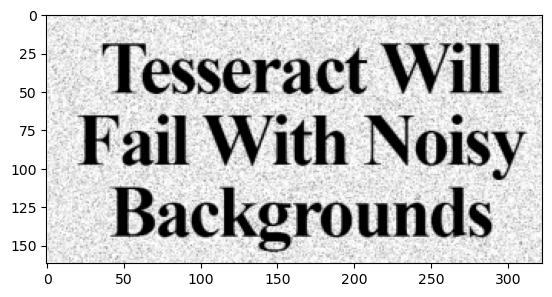

In [22]:
image = cv.imread("Images\OCR_english_text2.png", 0)
image_rgb = cv.imread("Images\OCR_english_text2.png")
img_blur = cv.medianBlur(image, 3)
_,img_thresh = cv.threshold(img_blur, 100, 255, cv.THRESH_BINARY)
plt.imshow(image, cmap = 'gray')

In [23]:
img_text = pytesseract.image_to_string(img_thresh)
print(img_text)

Tesseract Will
Fail With Noisy
Backgrounds



### English Test 2

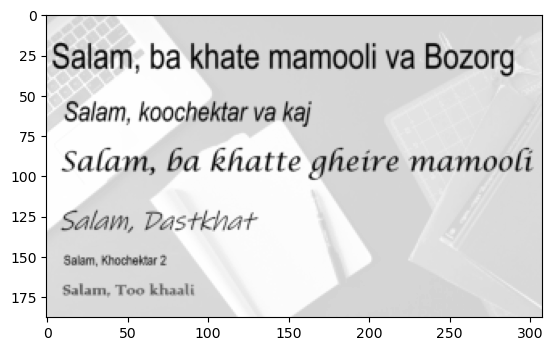

In [24]:
image = cv.imread("Images\OCR_english_text.png", 0)
plt.imshow(image, cmap = 'gray')

In [25]:
img_text = pytesseract.image_to_string(image)
print(img_text)

Salam, ba khate mamooli va Bozorg
Salam, koochektar va kaj
Salam, ba khatte gheire mamooli

Salam, Dastkhat

Solam, Too kasi



### English Test 3

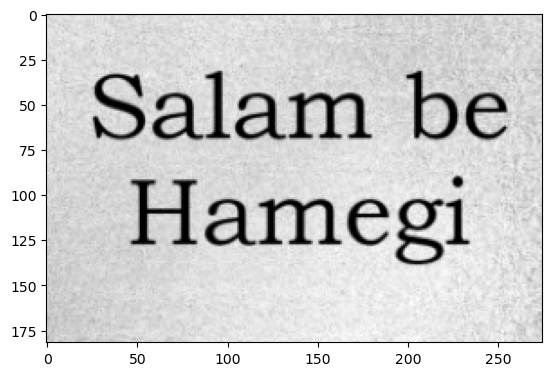

In [26]:
image = cv.imread("Images\OCR_english_text3.png", 0)
plt.imshow(image, cmap = 'gray')

In [27]:
img_text = pytesseract.image_to_string(image)
print(img_text)

Salam be
Hamegi



In [28]:
text_boxes = pytesseract.image_to_boxes(image)
print(text_boxes)

S 26 112 55 148 0
a 59 112 87 138 0
l 89 113 102 150 0
a 105 112 133 138 0
m 135 113 181 138 0
b 200 112 228 150 0
e 233 112 256 138 0
H 47 54 84 90 0
a 88 53 116 79 0
m 118 54 164 79 0
e 144 43 179 92 0
g 167 53 190 79 0
i 194 43 235 92 0



In [29]:
text_boxes

'S 26 112 55 148 0\na 59 112 87 138 0\nl 89 113 102 150 0\na 105 112 133 138 0\nm 135 113 181 138 0\nb 200 112 228 150 0\ne 233 112 256 138 0\nH 47 54 84 90 0\na 88 53 116 79 0\nm 118 54 164 79 0\ne 144 43 179 92 0\ng 167 53 190 79 0\ni 194 43 235 92 0\n'

In [30]:
text_boxes_list = text_boxes.split('\n')
text_boxes_list

['S 26 112 55 148 0',
 'a 59 112 87 138 0',
 'l 89 113 102 150 0',
 'a 105 112 133 138 0',
 'm 135 113 181 138 0',
 'b 200 112 228 150 0',
 'e 233 112 256 138 0',
 'H 47 54 84 90 0',
 'a 88 53 116 79 0',
 'm 118 54 164 79 0',
 'e 144 43 179 92 0',
 'g 167 53 190 79 0',
 'i 194 43 235 92 0',
 '']

In [31]:
image_rgb = cv.imread("Images\OCR_english_text3.png")
w,h,c = image_rgb.shape
print(w,h,c)

182 275 3


112 148
70 34
------
112 138
70 44
------
113 150
69 32
------
112 138
70 44
------
113 138
69 44
------
112 150
70 32
------
112 138
70 44
------
54 90
128 92
------
53 79
129 103
------
54 79
128 103
------
43 92
139 90
------
53 79
129 103
------
43 92
139 90
------


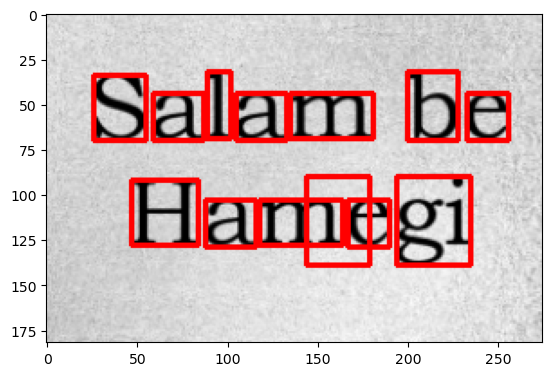

In [32]:
for box_coords in text_boxes_list:
    box_coords = box_coords.split(' ')
    if box_coords[0]:
        #print(box_coords)
        x1 = int(box_coords[1])
        y1 = int(box_coords[2])
        x2 = int(box_coords[3])
        y2 = int(box_coords[4])
        print(y1,y2)
        print(w-y1,w-y2)
        print("------")
        cv.rectangle(image_rgb, (x1,w-y1), (x2,w-y2), (255,0,0), 2)
plt.imshow(image_rgb)

In [33]:
img_data = pytesseract.image_to_data(image, output_type=Output.DICT)
img_data

{'level': [1, 2, 3, 4, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1],
 'left': [0, 26, 26, 26, 26, 200, 47, 47],
 'top': [0, 32, 32, 32, 32, 32, 90, 90],
 'width': [275, 230, 230, 230, 155, 56, 188, 188],
 'height': [182, 107, 107, 38, 38, 38, 49, 49],
 'conf': [-1, -1, -1, -1, 96, 96, -1, 91],
 'text': ['', '', '', '', 'Salam', 'be', '', 'Hamegi']}

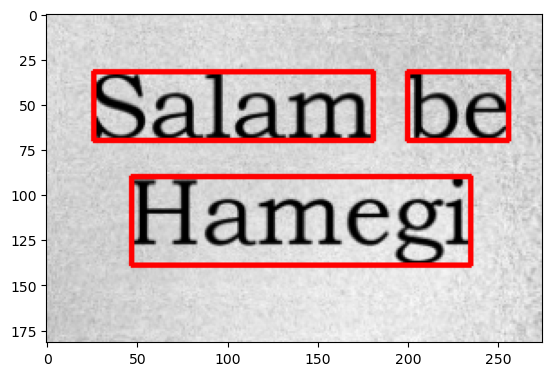

In [34]:
image_rgb = cv.imread("Images\OCR_english_text3.png")
w,h,c = image_rgb.shape

for index,text in enumerate(img_data['text']):
    if text:
        x1= int(img_data['left'][index])
        y1= int(img_data['top'][index])
        x2 = x1 + int(img_data['width'][index])
        y2 = y1 + int(img_data['height'][index])
        cv.rectangle(image_rgb, (x1, y1), (x2, y2), (255,0,0), 2)

plt.imshow(image_rgb)

##  تشخیص متن فارسی


### Persian Test 1

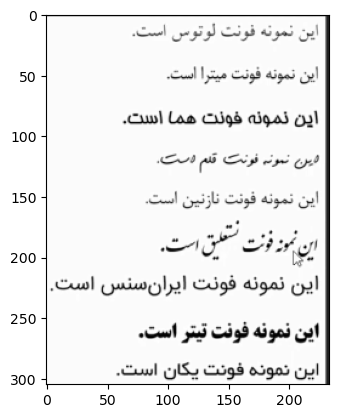

In [35]:
image = cv.imread("Images\OCR_persian_text2.png",0)
plt.imshow(image, cmap = 'gray')

In [36]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)

این نمونه فونت لوتوس است.

اين نمونه فونت میترا ست.
این نمونه فونت هما است.

هن نمون فونک تلم مک.

اين نمونه فونت نازنین است.

این نمونه فونت تیتر است.
نمونه فونت یکان است.




### Persian Test 2

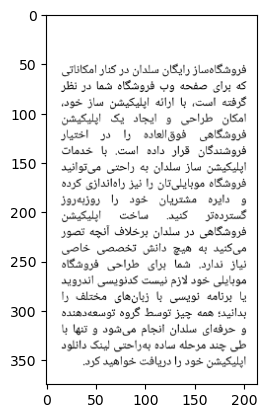

In [37]:
image = cv.imread("Images\OCR_persian_text.png",0)
plt.imshow(image, cmap = 'gray')

In [38]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)

فروشگاه‌سازرایگان سلدان در کنر امکانتی
که برای صفحه وب فروشگاه شما در نظر
گرفته است, با اائه ابلیکیشن ساز خود؛
امکان طراحی و ایجاد یک
فروشگاهی . فوق‌العاده را در اختیار
فروشننگان قرار داده است. پا خدمات
اپلیکیشن ساز سلدان به راحتی می‌توانید
فروشگاه موبایلی‌تان را یز راهاندازی کرده
و_دایره مشتریان خود را روزیه‌روز
گسترده‌تر . کنید. ‏ ساخت اپلیکیشن
فروشگاهی در سلدان برخلاف آنچه تصور
می‌کنید به هیچ داتش تخصصی خاصی
نیاز ندارد. شعا برای طراحی فروشگاه
موبایلی خود لازم نیست کدنویسی اندروید
یا برنامه تویسی با زیان‌های مختلف را
بدا

همه چیز توسط گروه توسع‌دهنده
و حرفه‌ای سلدان انجام می‌شود و تتها با
طی چند مرحله سادهبهراحتی لینک دانلود
اپلیکیشن خود را دریافت خواهید کرد




### Persian Test 3

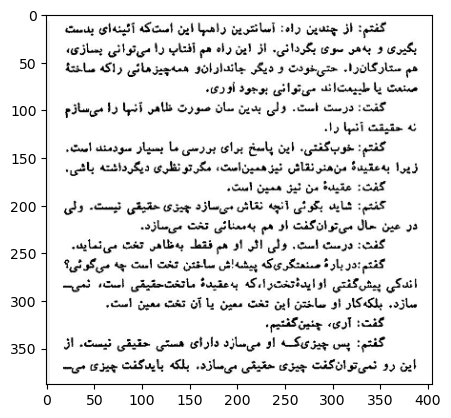

In [39]:
image = cv.imread("Images\OCR_persian_text3.png",0)
plt.imshow(image, cmap = 'gray')

In [40]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)

گفتم: از چندین راه: آسانترین راهمپا این است‌که آئینه‌ای پدست
بگیری و به‌می سوی بگردانی. اژ این راه هم آفتاب را می‌توانی بسازی»
هم ستارگان‌را. حتی‌خودت و دیگر جاندارانو همه‌چیزمائی راکه ساختة
تمت یا طبیمت اند می‌توانی بوجود آوری
درست است. ولی بدین سان صورت ظامی آنبا دا می‌سازم
نه حقیقت آنپا راء

گفتم: خوب‌گفتی. اين پاسخ برای بررسی ما بسیار سودمند است.
زیرا به‌عتید؛ من‌هنر نقاش نیز‌همین‌است» مگرتو نظری دیگرداشته باشی.

ی حقیقی نیست. ولی

حال می‌توان گفت او هم به‌معنائی تخت می‌سازد.

: درست است. ولی الي او هم فقط به‌ظاهی تفت می‌تماید.
گفتم :در یار صنعتگری که پیشه‌اش سالفتن تخت است چه می‌گوثی؟

اندکی پیش‌گفتی او ایدُتخت‌راء که بهعقيد؛ ماتخت‌حقیقی است» نمی

سازه. بلکه‌کار او سا.
گفت: آری.
گفتم: پس چیزی‌که او می‌سازد دارای هستی حتیقی تیست. از

چیزی حقیقی می‌سازد. بلکه بایدگفت چیزی میس

اين رو نمی‌توان؛



## تشخیص متن فارسی و انگلیسی به صورت همزمان

### English_Persian Test 1

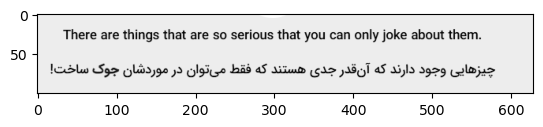

In [41]:
image = cv.imread("Images\OCR_text.png",0)
plt.imshow(image, cmap = 'gray')

In [42]:
text = pytesseract.image_to_string(image, lang='eng+fas')
with open('converted image.txt', mode='w',encoding='utf-8')as textFile:
    textFile.write(text)
    print(text)

There are things that are so serious that you can only joke about them.

چیزهایی وجود دارند که آن‌قدر جدی هستند که فقط می‌توان در موردشان جوک ساخت!



### English_Persian Test 2


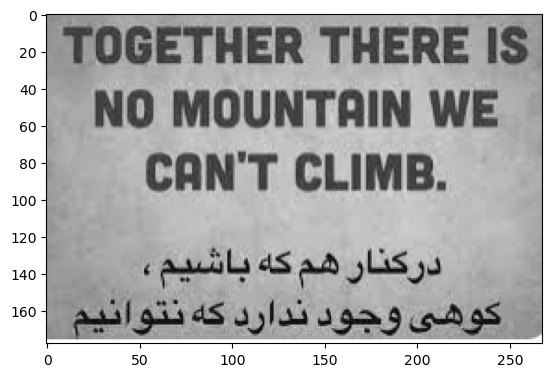

In [43]:
image = cv.imread("Images\OCR_text2.png",0)
image_rgb = cv.imread("Images\OCR_text2.png")
img_blur = cv.medianBlur(image, 7)
_,img_thresh = cv.threshold(img_blur, 200, 255, cv.THRESH_BINARY)
plt.imshow(image, cmap = 'gray')

In [44]:
text = pytesseract.image_to_string(image, lang='eng+fas')
with open('converted image.txt', mode='w',encoding='utf-8')as textFile:
    textFile.write(text)
    print(text)

TOGETHER THERE IS
NO MOUNTAIN WE
CAN'T CLIMB.

درکنار هم که باشیم ,
کوهی وجود ندارد که نتوانیم



### English_Persian Test 3

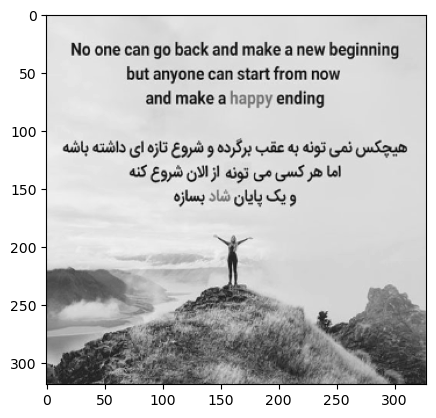

In [45]:
image = cv.imread("Images\OCR_text3.png",0)
image_rgb = cv.imread("Images\OCR_text3.png")
img_blur = cv.medianBlur(image, 7)
_,img_thresh = cv.threshold(img_blur, 200, 255, cv.THRESH_BINARY)
plt.imshow(image, cmap = 'gray')

In [46]:
text = pytesseract.image_to_string(image, lang='eng+fas')
with open('converted image.txt', mode='w',encoding='utf-8')as textFile:
    textFile.write(text)
    print(text)

No one can go back and make anew beginning
but anyone can start from now
and make a hiappy ending

هیچکس نمی تونه به عقب برگرده و شروع تازه ای داشته باشه
اما هر کسی می تونه ازالان شروع کنه
ویک پایان شاد بسازه




In [47]:
text_boxes = pytesseract.image_to_boxes(image)
print(text_boxes)

N 22 283 30 294 0
o 31 283 38 292 0
o 42 283 49 292 0
n 50 283 56 292 0
e 57 283 64 292 0
c 68 283 74 292 0
a 75 283 81 292 0
n 82 283 89 292 0
g 93 280 99 292 0
o 100 283 107 292 0
b 111 283 118 295 0
a 119 283 125 292 0
c 126 283 132 292 0
k 133 283 140 295 0
a 143 283 150 292 0
n 151 283 157 292 0
d 158 283 165 295 0
m 169 283 180 292 0
a 181 283 187 292 0
k 188 283 195 295 0
e 195 283 202 292 0
a 206 283 212 292 0
n 216 283 223 292 0
e 224 283 230 292 0
w 231 283 240 292 0
b 244 283 251 295 0
e 250 280 258 295 0
g 252 280 266 292 0
i 267 283 269 295 0
n 271 283 277 292 0
n 278 283 285 292 0
i 286 283 288 295 0
n 289 283 296 292 0
g 297 280 304 292 0
b 70 262 76 274 0
u 74 262 82 274 0
t 77 262 89 272 0
a 92 262 99 271 0
n 100 262 106 271 0
y 107 259 113 271 0
o 111 259 118 271 0
n 114 262 121 271 0
e 122 262 136 271 0
c 140 262 144 271 0
a 140 262 146 271 0
n 147 262 161 271 0
s 165 262 168 272 0
t 167 262 175 272 0
a 165 262 183 272 0
r 180 262 188 272 0
t 184 262 193 272 0
f 198 

In [48]:
text_boxes

'N 22 283 30 294 0\no 31 283 38 292 0\no 42 283 49 292 0\nn 50 283 56 292 0\ne 57 283 64 292 0\nc 68 283 74 292 0\na 75 283 81 292 0\nn 82 283 89 292 0\ng 93 280 99 292 0\no 100 283 107 292 0\nb 111 283 118 295 0\na 119 283 125 292 0\nc 126 283 132 292 0\nk 133 283 140 295 0\na 143 283 150 292 0\nn 151 283 157 292 0\nd 158 283 165 295 0\nm 169 283 180 292 0\na 181 283 187 292 0\nk 188 283 195 295 0\ne 195 283 202 292 0\na 206 283 212 292 0\nn 216 283 223 292 0\ne 224 283 230 292 0\nw 231 283 240 292 0\nb 244 283 251 295 0\ne 250 280 258 295 0\ng 252 280 266 292 0\ni 267 283 269 295 0\nn 271 283 277 292 0\nn 278 283 285 292 0\ni 286 283 288 295 0\nn 289 283 296 292 0\ng 297 280 304 292 0\nb 70 262 76 274 0\nu 74 262 82 274 0\nt 77 262 89 272 0\na 92 262 99 271 0\nn 100 262 106 271 0\ny 107 259 113 271 0\no 111 259 118 271 0\nn 114 262 121 271 0\ne 122 262 136 271 0\nc 140 262 144 271 0\na 140 262 146 271 0\nn 147 262 161 271 0\ns 165 262 168 272 0\nt 167 262 175 272 0\na 165 262 183 272

In [49]:
text_boxes_list = text_boxes.split('\n')

In [50]:
text_boxes_list

['N 22 283 30 294 0',
 'o 31 283 38 292 0',
 'o 42 283 49 292 0',
 'n 50 283 56 292 0',
 'e 57 283 64 292 0',
 'c 68 283 74 292 0',
 'a 75 283 81 292 0',
 'n 82 283 89 292 0',
 'g 93 280 99 292 0',
 'o 100 283 107 292 0',
 'b 111 283 118 295 0',
 'a 119 283 125 292 0',
 'c 126 283 132 292 0',
 'k 133 283 140 295 0',
 'a 143 283 150 292 0',
 'n 151 283 157 292 0',
 'd 158 283 165 295 0',
 'm 169 283 180 292 0',
 'a 181 283 187 292 0',
 'k 188 283 195 295 0',
 'e 195 283 202 292 0',
 'a 206 283 212 292 0',
 'n 216 283 223 292 0',
 'e 224 283 230 292 0',
 'w 231 283 240 292 0',
 'b 244 283 251 295 0',
 'e 250 280 258 295 0',
 'g 252 280 266 292 0',
 'i 267 283 269 295 0',
 'n 271 283 277 292 0',
 'n 278 283 285 292 0',
 'i 286 283 288 295 0',
 'n 289 283 296 292 0',
 'g 297 280 304 292 0',
 'b 70 262 76 274 0',
 'u 74 262 82 274 0',
 't 77 262 89 272 0',
 'a 92 262 99 271 0',
 'n 100 262 106 271 0',
 'y 107 259 113 271 0',
 'o 111 259 118 271 0',
 'n 114 262 121 271 0',
 'e 122 262 136 27

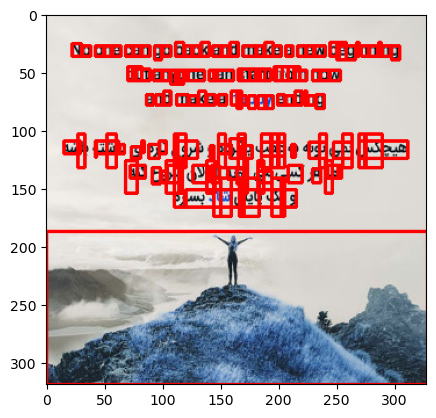

In [51]:
image_rgb = cv.imread("Images\OCR_text3.png")
w,h,c = image_rgb.shape

for box_coords in text_boxes_list:
    box_coords = box_coords.split(' ')
    if box_coords[0]:
        #print(box_coords)
        x1 = int(box_coords[1])
        y1 = int(box_coords[2])
        x2 = int(box_coords[3])
        y2 = int(box_coords[4])
        cv.rectangle(image_rgb, (x1,w-y1), (x2,w-y2), (255,0,0), 2)
plt.imshow(image_rgb)

In [52]:
img_data = pytesseract.image_to_data(image, output_type=Output.DICT)
img_data

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

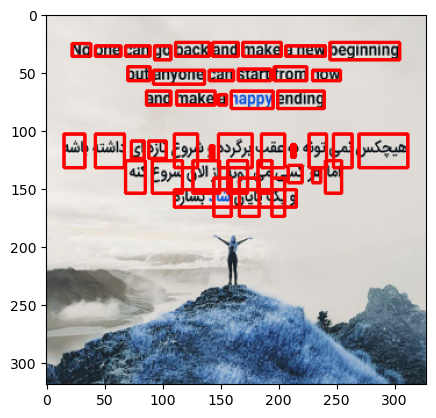

In [53]:
image_rgb = cv.imread("Images\OCR_text3.png")
w,h,c = image_rgb.shape

for index,text in enumerate(img_data['text']):
    if text:
        x1= int(img_data['left'][index])
        y1= int(img_data['top'][index])
        x2 = x1 + int(img_data['width'][index])
        y2 = y1 + int(img_data['height'][index])
        cv.rectangle(image_rgb, (x1, y1), (x2, y2), (255,0,0), 2)

plt.imshow(image_rgb)

## تشخیص ارقام فارسی و انگلیسی

### Digit recognition Test 1

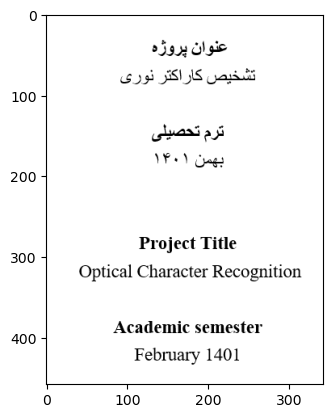

In [54]:
image = cv.imread("Images\OCR_text4.png",0)
plt.imshow(image, cmap = 'gray')

In [55]:
text = pytesseract.image_to_string(image, lang='eng+fas')
with open('converted image.txt', mode='w',encoding='utf-8')as textFile:
    textFile.write(text)
    print(text)

عنوان پروژه
تشخیص کاراکتر نوری

ترم تحصیلی
بهمن ۱۴۰۱
‎Project Title‏

Optical Character Recognition

Academic semester
February 1401



## تشخیص ارقام و حروف از یکدیگر

In [77]:
def recognition_letter_digit(text):
    countOfDigits=0;
    countOfLetter=0;

    for t in text:
        if t.isdigit():
            countOfDigits +=1
            print(t)
        elif t.isspace():
            t.strip()
        else:
            countOfLetter +=1
            print(t)

    print("countOfDigits: ",countOfDigits)
    print("countOfLetter: ",countOfLetter)

### Digit recognition Test 2

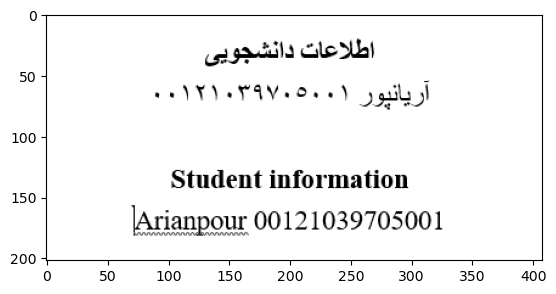

In [78]:
image = cv.imread("Images\OCR_text5.png",0)
plt.imshow(image, cmap = 'gray')

In [79]:
text = pytesseract.image_to_string(image, lang='eng+fas')
with open('converted image.txt', mode='w',encoding='utf-8')as textFile:
    textFile.write(text)
    print(text)

اطلاعات دانشجویی
آریانپور ۰۰۱۲۱۰۳۹۷۰۵۰۰۱

Student information
|Arianpour 00121039705001



In [80]:
recognition_letter_digit(text)

ا
ط
ل
ا
ع
ا
ت
د
ا
ن
ش
ج
و
ی
ی
آ
ر
ی
ا
ن
پ
و
ر
۰
۰
۱
۲
۱
۰
۳
۹
۷
۰
۵
۰
۰
۱
S
t
u
d
e
n
t
i
n
f
o
r
m
a
t
i
o
n
|
A
r
i
a
n
p
o
u
r
0
0
1
2
1
0
3
9
7
0
5
0
0
1
countOfDigits:  28
countOfLetter:  51


### Digit recognition Test 3

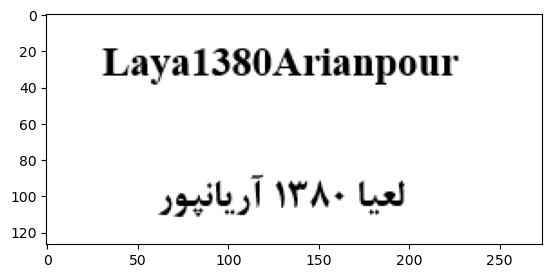

In [81]:
image = cv.imread("Images\OCR_text6.png",0)
plt.imshow(image, cmap = 'gray')

In [82]:
text = pytesseract.image_to_string(image, lang='eng+fas')
with open('converted image.txt', mode='w',encoding='utf-8')as textFile:
    textFile.write(text)
    print(text)

Laya1380Arianpour

لعیا ۱۳۸۰ آریانیور



In [83]:
recognition_letter_digit(text)

L
a
y
a
1
3
8
0
A
r
i
a
n
p
o
u
r
ل
ع
ی
ا
۱
۳
۸
۰
آ
ر
ی
ا
ن
ی
و
ر
countOfDigits:  8
countOfLetter:  25


## تشخیص ارقام انگليسي

### Digit recognition Test 4

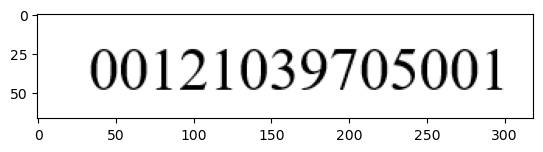

In [84]:
image = cv.imread("Images\OCR_English_number1.png",0)
plt.imshow(image, cmap = 'gray')

In [85]:
text = pytesseract.image_to_string(image, lang='eng')
print(text)



00121039705001



In [86]:
recognition_letter_digit(text)

0
0
1
2
1
0
3
9
7
0
5
0
0
1
countOfDigits:  14
countOfLetter:  0


### Digit recognition Test 5

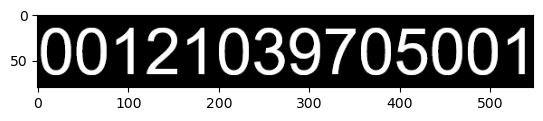

In [65]:
image = cv.imread("Images\OCR_English_number2.png",0)
image_rgb = cv.imread("Images\OCR_English_number2.png")
img_blur = cv.medianBlur(image, 5)
_,img_thresh = cv.threshold(img_blur, 100, 255, cv.THRESH_BINARY)
plt.imshow(image, cmap = 'gray')

In [66]:
text = pytesseract.image_to_string(image, lang='eng')
print(text)


00121039705001



## مشکل تشخیص ارقام فارسی

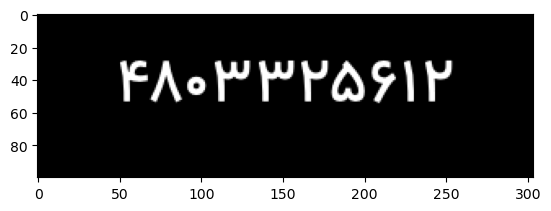

In [67]:
image = cv.imread("Images\OCR_Persian_number1.png",0)
image_rgb = cv.imread("Images\OCR_Persian_number1.png")
img_blur = cv.medianBlur(image, 5)
_,img_thresh = cv.threshold(img_blur, 100, 255, cv.THRESH_BINARY)
plt.imshow(image, cmap = 'gray')

In [68]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)


و



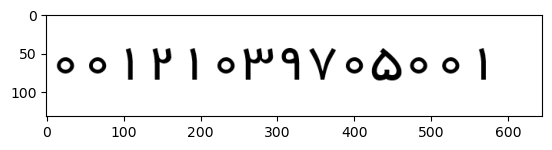

In [89]:
image = cv.imread("Images\OCR_Persian_number2.png",0)
plt.imshow(image, cmap = 'gray')

In [91]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)

| ۰ 0۵۰ ۱۰۳۹۷ ۱۳ ۰ ه



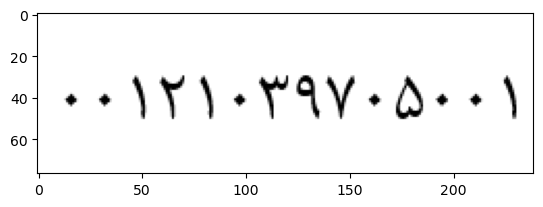

In [87]:
image = cv.imread("Images\OCR_Persian_number5.png",0)
plt.imshow(image, cmap = 'gray')

In [88]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)


۱ اه



### تنها در صورت وجود حرف فارسي كنار ارقام فارسي آن هارا درست تشخيص ميدهد

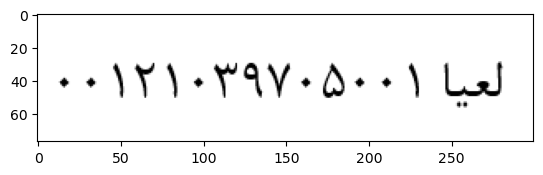

In [72]:
image = cv.imread("Images\OCR_Persian_number4.png", 0)
plt.imshow(image, cmap = 'gray')

In [73]:
text = pytesseract.image_to_string(image, lang='fas')
print(text)

لعیا ۰۰۱۲۱۰۳۹۷۰۵۰۰۱



# محاسبه دقت   

In [74]:
def calculate_accuracy(image_paths, ground_truth_texts):
    total_images = len(image_paths)
    correctly_detected_images = 0

    for i in range(total_images):
        image_path = image_paths[i]
        ground_truth_text = ground_truth_texts[i]

        # بارگیری تصویر با استفاده از PIL
        image = Image.open(image_path)

        # تشخیص متن با pytesseract
        detected_text = pytesseract.image_to_string(image, lang='eng')
        #print(detected_text)

        # مقایسه متن تشخیص داده شده با متن معتبر
        if detected_text.strip() == ground_truth_text.strip():
            correctly_detected_images += 1

    accuracy = (correctly_detected_images / total_images) * 100

    return accuracy

### محاسبه دقت براي تصاوير فارسي و انگليسي

In [75]:
image_path = ['Images\OCR_english_text2.png','Images\OCR_english_text.png','Images\OCR_english_text3.png',
              'Images\OCR_persian_text2.png','Images\OCR_text6.png','Images\OCR_Persian_number2.png']

OCR_english_text2='''
Tesseract Will
Fail With Noisy
Backgrounds'''

OCR_english_text='''
Salam, ba khate mamooli va Bozorg
Salam, koochektar va kaj
Salam, ba khatte gheire mamooli

Salam, Dastkhat

Solam, Too kasi
'''

OCR_english_text3='''
Salam be
Hamegi
'''

OCR_persian_text2='''
این نمونه فونت لوتوس است.
اين نمونه فونت میترا ست.
این نمونه فونت هما است.
اين نمون فونت قلم است.
اين نمونه فونت نازنین است.
اين نمونه فونت نستعليق است.
اين نمونه فونت ايران سنس است.
این نمونه فونت تیتر است.
اين نمونه فونت یکان است.
'''


OCR_text6='''
Laya1380Arianpour

لعیا ۱۳۸۰ آریانیور
'''
OCR_Persian_number2='۰۰۱۲۱۰۳۹۷۰۵۰۰۱'

ground_truth_texts = [OCR_english_text2,OCR_english_text,OCR_english_text3,OCR_persian_text2,OCR_text6,OCR_Persian_number2]

accuracy = calculate_accuracy(image_path, ground_truth_texts)
print("Accuracy:", accuracy)

Accuracy: 50.0


### محاسبه دقت براي تصاوير انگليسي

In [76]:
image_path = ['Images\OCR_english_text2.png','Images\OCR_english_text.png','Images\OCR_english_text3.png']

OCR_english_text2='''
Tesseract Will
Fail With Noisy
Backgrounds'''

OCR_english_text='''
Salam, ba khate mamooli va Bozorg
Salam, koochektar va kaj
Salam, ba khatte gheire mamooli

Salam, Dastkhat

Solam, Too kasi
'''

OCR_english_text3='''
Salam be
Hamegi
'''

ground_truth_texts = [OCR_english_text2,OCR_english_text,OCR_english_text3]


accuracy = calculate_accuracy(image_path, ground_truth_texts)
print("Accuracy:", accuracy)

Accuracy: 100.0
